**NOTE:**

This notebook represents a summary on how one can solve differential equations symbolically using the `sympy` library in python. It represents an additional resource to a topic covered in my Youtube channel [@Younes Lab](https://www.youtube.com/channel/UCeNWB5QgkL4iQXCAz68zpbg). Feel free to check it out ^^ : https://youtu.be/R25dZ5XLdDA

---------------
---------------

# Solving Differential Equations with SymPy (symbolically)

* SymPy is a Python library for symbolic mathematics, which happens to be written entirely in `python`. For more informations check the  [official website](https://www.sympy.org/en/index.html)

* Installing the library using pip:
---------------
```python
>> pip install sympy
```
---------------

The process of Solving a Differential Equation analytically/symbolically using SymPy can be summerized as follows:
1. Define the Differential Equation (with symbols, derivatives, etc).
2. Define the set of Initial/Boundary conditions (IVP/BVP).
3. Solve the Differential Equation to get an analytical solution. 
4. Convert your analytical solution into a numerical solution
5. (optional) Display the results with matplotlib for ex.

**Table of Contents:**

1. Overview
2. Classification of a differential equation
3. Importance of Classifying Differential Equations for Analytical Solutions in SymPy
4. Solving the damped mass-spring system using `sympy`



--------------------------
--------------------------

## I. Overview
Differential equations are mathematical equations that relates a function $y$ to its derivatives $y', y'', y^{(3)}, ..., y^{(n)}$ and so on.

Some examples on Mathematical Differential Equations include:

* $ y' + y = x^2 $ 
* $ y'' + 2y' + y = \sin(x) $

The example that will be considered in this notebook is the damped mass-spring system. A mass $m$ is attached to a spring with a stiffness $k$ that, over time, losses it's energy due to a damping effect $\zeta$. This mass can be optionnaly be excited by an external force over time $F_{ext}(t)$.

By using lagrangian mehcanics on such a system, the differential equation that governs the displacement of the mass $m$ is:

$$ m \frac{d^2 x(t)}{dt^2}  +  \zeta \frac{d x(t)}{dt} + k x = F_{ext}(t) $$

Another way of representing the equation above is to divide by the mass $m$ and represent the derivatives in the *dot form*:

$$ \ddot{x}(t) +  \frac{\zeta}{m} \dot{x}(t) + \frac{k}{m} x(t) = \frac{F_{ext}(t)}{m}$$


**Relevance for Engineers:**

In engineering, differential equations serve as powerful tools for **modeling physical systems** and **predicting** their behavior over time. Engineers use differential equations to design control systems, analyze heat transfer processes, understand fluid dynamics, and optimize structural designs, among other applications.

* Heat Distribution on a 2D plate
* Motion of a Simple and Double Pendulum, or even very complex mechanical systems
* Chaos theory related problem (Lorenz Attractor, The three body problem, etc.)


By formulating and solving differential equations, engineers can make informed decisions to improve the performance and efficiency of engineering systems whether in mechanical, civil, structure, chimical, physics, nuclear, etc.

--------------------------
--------------------------

## II. Classification of a differential equation

Differential equations can be classified into several types based on various criteria, including their order, linearity, and coefficients. Some common types include:

1. **Type of Differential Equation**
    A Differential Equation has two major types, it can be either an *Ordinary Differential Equation* (ODEs) or a *Partial Differential Equation* (PDEs):

    1.1. *Ordinary Differential Equations (ODEs)*:
      Equations involving derivatives with respect to a single independent variable. The studied entity varies only across one variable, it is "ordinary".
      - Example: $ \frac{dy}{dt} = k \cdot y $ (exponential growth/decay).

    1.2. *Partial Differential Equations (PDEs)*:
      Equations involving derivatives with respect to multiple independent variables. The studied entity partly varies across one variable, and partly across another one.
      - Example: $ \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0 $ (Laplace's equation).

2. **Linearity of a Differential Equation**:
   Here as well, we identify two types, linear and non-linear differential equations:

   2.1. *Linear Differential Equations*:
      Equations where the dependent variable and its derivatives appear linearly.
      - Example: $ \frac{d^2y}{dx^2} + 2y = \sin(x) $.
      - Example: $ \frac{d^2y}{dx^2} + \pi y = \sin(x) - 0.34 $.

   2.2. *Nonlinear Differential Equations*:
      Equations where the dependent variable and its derivatives appear nonlinearly.
      - Example: $ \frac{dy}{dx} = y^2 + x $.
      - Example: $ \frac{dy}{dx} = \sin(y) + x $.
      - Example: $ \frac{dy}{dx} = \frac{1}{y} + x $.

3. **Order of a differential equation**:
   The order of a differential equation is the highest derivative of the unknown function that appears in the equation.
   - Example: $ \frac{d^2 y}{dx^2} + 3 \frac{dy}{dx} + 2y = 0$
      * This is a $2^{nd}$-order ODE because the highest derivative is $\frac{d^2 y}{dx^2}$

   - Example: $ k\frac{\partial ^2 u}{\partial x^2} + \frac{\partial u}{\partial t} = Q$
      * This is a $2^{nd}$-order in space (x) and a $1^{st}$-order in time (t)

--------------------------
--------------------------

## III. Importance of Classifying Differential Equations for Analytical Solutions in SymPy

Knowing the type of a differential equation is important for determining whether it can be solved analytically using the SymPy library. SymPy provides a variety of methods for solving differential equations, but the effectiveness of these methods often depends on the specific characteristics of the equation. Here's why classification matters:

1. **Ordinary Differential Equations (ODEs) vs. Partial Differential Equations (PDEs):**
   - **ODEs:** SymPy has robust capabilities for solving many types of ODEs. It supports a wide range of techniques for both linear and nonlinear ODEs, including exact solutions, series solutions, and numerical methods.
     - Example: $ \frac{dy}{dt} = k \cdot y $ can be solved using SymPy’s `dsolve` function.

   - **PDEs:** SymPy's support for PDEs is more limited compared to ODEs. While it can handle some standard forms (such as the heat equation or wave equation), more complex or nonlinear PDEs may not be solvable analytically within SymPy.
     - Example: $ \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0 $ (Laplace's equation) can be approached in SymPy, but complex boundary conditions or nonlinear terms might require numerical solutions.

2. **Linearity:**
   - **Linear Differential Equations:** SymPy excels at solving linear differential equations. Techniques such as integrating factors, characteristic equations, and variation of parameters are well-supported.
     - Example: $ \frac{d^2y}{dx^2} + 2y = \sin(x) $ can be solved using SymPy’s linear ODE solvers.
     
   - **Nonlinear Differential Equations:** Solving nonlinear differential equations is generally more challenging. SymPy can sometimes find solutions for specific forms of nonlinear equations, but the success is less guaranteed, and numerical methods might be required.
     - Example: $ \frac{dy}{dx} = y^2 + x $ may or may not have an analytical solution accessible in SymPy, and numerical solvers like `odeint` (or the `solve_ivp & solve_bvp` from the `scipy` library) might be needed.

3. **Order of the Differential Equation:**
   - **Higher-Order Differential Equations:** The order of the differential equation impacts the complexity of finding a solution. SymPy can handle higher-order linear ODEs efficiently, but as the order increases, especially for nonlinear equations, the complexity of finding an analytical solution also increases.
     - Example: $ \frac{d^2 y}{dx^2} + 3 \frac{dy}{dx} + 2y = 0 $ (second-order ODE) is manageable in SymPy.
     - Example: $ k\frac{\partial^2 u}{\partial x^2} + \frac{\partial u}{\partial t} = Q $ (second-order in space, first-order in time PDE) may be approached if it fits standard solvable forms.

Understanding these classifications helps determine the feasibility of using SymPy for an analytical solution. While SymPy is a powerful tool, recognizing the limitations based on the type of differential equation ensures more efficient problem-solving and sets realistic expectations regarding the capabilities of the software.


--------------------------
--------------------------

## IV. Solving the damped mass-spring system using `sympy`

The considered example is $2^{nd}$ order in space ODE with a non-homogenous part $F_{ext}$. To recall, here a the five steps to go through for solving this equation:

1. Define the Differential Equation (with symbols, derivatives, etc).
2. Define the set of Initial/Boundary conditions (IVP/BVP).
3. Solve the Differential Equation to get an analytical solution. 
4. Convert your analytical solution into a numerical solution
5. (optional) Display the results with matplotlib for ex.

------
-----

### 1. Defining the differential Equation

To define a differential equation symbolically using *SymPy* the main functions/classes you will be using are the following:

* `sympy.symbols`: This function allows you to create symbolic variables in `sympy`, for a given set of assumptions. Here are some example:
-------------------------------
```python
>> a, b, c = sympy.symbols('a, b, c', real=True) # Coefficients of a quadratic equation having some assumptions
>> x = sympy.symbols('x') # Defining our variable x
>> 
>> quadEquation = a*x**2 + b*x + c # Defining an equation using constants and variables
>> quadEquation
```
$ ax^2 + bx + c $

-------------------------------

* `sympy.Function`: This class allows you to create symbolic function-like variables for example f(x), u(x, t), etc. Here are some examples:

-------------------------------
```python
>> t, x = sympy.symbols('t, x') # Creating two variables, one temporal and one spacial.
>> 
>> y = sympy.Function('y')(x) # The sympy.Function operates very similarly that the sm.symbols, note that you need to then spcify between paranthesis (...) it's variables
>> u = sympy.Function('u')(x, t) # Here we create a function u(x, t)
>> u
```
$u(x, t)$ 
-------- ---------------------- 

* `sympy.diff` / `sympy.integrate`: These two functions are used to define symbolic derivatives/ integrals. Here are some examples:
--------------------
```python
>> du_dt = sympy.diff(u, t, 1) # Here sympy.diff(<function>, <variable>, <how many times>)
>> du_dt
```
$ \frac{\partial}{\partial t} u(x, t) $
```python
>> ddu_ddt = sympy.diff(u, t, 2) # Second derivative in time
>> ddu_ddt
```
$ \frac{\partial^2}{\partial t^2} u(x, t) $

```python
>> u_xxxx = sympy.diff(u, x, 4) # Fourth derivative in space
>> u_xxxx
```
$ \frac{\partial^4}{\partial x^4} u(x, t)  $
---------------------------- -

Having this in mind, it is now possible to build the differential equation.

In [152]:
# Importing the sympy library as sm (alternatively as smp)
import sympy as sm

In [153]:
# 1. Defining the constants of the equation
k, c, m = sm.symbols('k, \\zeta, m', positve=True, real=True)    # (optional) It is possible to speficy assumptions on the variables
                                                                # This usually helps sympy make some simplifications.
                                                                # Here \zeta is just a symbol for the damping coefficient c

# 2. Defining the variables, in our case, time only.
t = sm.symbols('t', positve=True, real=True)

# 3. Defining the function of the position x(t) and external forces F_ext(t)
x = sm.Function('x', complex=True)(t)
F_ext = sm.Function('F_{ext}', real=True)(t)

# Derivatives
dx_dt = sm.diff(x, t, 1) # First
ddx_ddt = sm.diff(x, t, 2) # Second

Having all the term of the differential equations, there are two main ways to frame an equation in sympy:

1. By expressing an equation equal to zero (moving all the terms to one side of the equation) leading to:
$$ \ddot{x}(t) +  \frac{\zeta}{m} \dot{x}(t) + \frac{k}{m} x(t) = \frac{F_{ext}(t)}{m}$$
$$ \ddot{x}(t) +  \frac{\zeta}{m} \dot{x}(t) + \frac{k}{m} x(t) - \frac{F_{ext}(t)}{m} = 0$$

2. (Preferable) By using the `Eq()` class that allows to construct an equation, here you have to specify the right hand side and the left handside seperatly (also known as rhs and lhs).
$$ right \ hand \ side = \frac{F_{ext}(t)}{m}$$
$$ left \ hand \ side = \ddot{x}(t) +  \frac{\zeta}{m} \dot{x}(t) + \frac{k}{m} x(t) $$

In [154]:
# --- 1st method --- #
myEquation = ddx_ddt + (c/m)*dx_dt + (k/m)*x - F_ext/m

# --- 2nd method (preferable) --- #
lhs = ddx_ddt + (c/m)*dx_dt + (k/m)*x
rhs = F_ext/m

# using right- and left hand side to build our equation using Eq()
myEquation = sm.Eq(lhs, rhs)
myEquation

Eq(\zeta*Derivative(x(t), t)/m + k*x(t)/m + Derivative(x(t), (t, 2)), F_{ext}(t)/m)

-----------
-----------

### 2. Specifying the initial conditions
It is technically possible to not specify the initial/boundary conditions, but in this case the symbolic solution will be in terms of constants $C_1, C_2, ... \in \R$. The way a set of condition is specified depends on which solver one is using, when it comes to the `dsolve` solver (used to solve symbolic equations), according to the documentation, it should be specified as follows:

-------------
```python
def dsolve(eq, func=None, hint="default", simplify=True,
    ics= None, xi=None, eta=None, x0=0, n=6, **kwargs):
    r"""
    Solves any (supported) kind of ordinary differential equation and
    system of ordinary differential equations.

    For single ordinary differential equation
    =========================================

    It is classified under this when number of equation in ``eq`` is one.
    **Usage**

        ``dsolve(eq, f(x), hint)`` -> Solve ordinary differential equation
        ``eq`` for function ``f(x)``, using method ``hint``.

    **Details**

        [...]

        ``ics`` is the set of initial/boundary conditions for the differential equation.
          It should be given in the form of ``{f(x0): x1, f(x).diff(x).subs(x, x2):
          x3}`` and so on.  For power series solutions, if no initial
          conditions are specified ``f(0)`` is assumed to be ``C0`` and the power
          series solution is calculated about 0.
```
---------

Here the conditions should be given in form of a python dictionary, notice that the `.subs()` method is used.

```python
initial_conditions = {
    f(x0): x1,  # First condition
    f(x).diff(x).subs(x, x2): x3 # Second condition
    }
```

The proposed example might be not straight forward to understand, so it is preferable to directly jump to our differential equation to understand it better.

Since we have a temporal problem (here $x(t)$ is a function of time) it is common to specify an Initial Value Problem (IVP). These involve specifying the values of the function $x(t)$ and its derivatives at a single point, often denoted as $t = t_0$ (usually $t_0 = 0$).

Since our ODE is $2^{nd}$ order in time, two conditions are required, let's set the following conditions:
* $ x(0) = 0.1 $: The mass starts at a position x=0.1 [m]
* $ \frac{dx}{dt} |_{t=0} = 0 $: We do not have an initial velocity.


The way you would build this set of initial conditions is the following:


In [155]:
# Specifying our initial conditions
initial_conditions = {
    x.subs(t, 0): 0.1, # x(0) = 0.1
    dx_dt.subs(t, 0): 0  # dx_dt(0) = 0.0
    }

The `subs` method in sympy is short for subtitute, as is used when ever we want to replace the value of some variable within a symbolic expression. Consider the following example:

--------------------
```python
>> a, b, c, t = sympy.symbols('a, b, c, t')
>> expression = a * t**2 + b * t + c
>> expression
```
$a t^2 + bt + c$
```python
>> new_expression = expression.subs([  (a, 1), (b, 0.4), (c, sympy.sqrt(5)) ]) # Substituting the values of a, b and c. 
>> new_expression
```
$t^2 + 0.4t + \sqrt{5}$

```python
>> new_expression.subs(t, 0.1) # Replacing t with 0.1
>> new_expression
```
$0.05 + \sqrt{5}$
----------------- ---

In our case to get $x(0)$ and $\frac{dx}{dt}(0)$ we use the `.subs()` method in the following manner:
* `x.subs(t, 0)` is equivalent to `x(0)` (replacing t with 0 within x)
* `dx_dt.subs(t, 0)` is equivalent to `dx_dt(0)` (replacing t with 0 within dx_dt)

-------------------------
-------------------------

### 3. Solving our Differential Equation
After properly defining the differential equation and setting proper conditions (IVP or BVP) it is time to solve our differential equation symbolically. To achieve this, there is a function within SymPy called `dsolve` short for *diff/differential-solve*. It takes as input:

* A differential equation (`myEquation`).
* The function across which we want to solve the equation for (In our case `x(t)`).
* (Optional but highly recommended) The initial conditions of our problem (`ics=initial_conditions`).

In [156]:
# Solving our differential equation using `dsolve()`
solution = sm.dsolve(myEquation, x, ics=initial_conditions)
solution

Eq(x(t), (-0.025*\zeta/sqrt(0.25*\zeta**2 - k*m) + 0.05 + 0.5*Integral(F_{ext}(t)*exp(0.5*\zeta*t/m)*exp(1.0*t*sqrt(0.25*\zeta**2 - k*m)/m), (t, 0))/sqrt(0.25*\zeta**2 - k*m))*exp(-t*(\zeta + sqrt(\zeta**2 - 4*k*m))/(2*m)) + (0.025*\zeta/sqrt(0.25*\zeta**2 - k*m) + 0.05 - 0.5*Integral(F_{ext}(t)*exp(0.5*\zeta*t/m)*exp(-1.0*t*sqrt(0.25*\zeta**2 - k*m)/m), (t, 0))/sqrt(0.25*\zeta**2 - k*m))*exp(t*(-\zeta + sqrt(\zeta**2 - 4*k*m))/(2*m)) + exp(t*(-\zeta + sqrt(\zeta**2 - 4*k*m))/(2*m))*Integral(F_{ext}(t)*exp(\zeta*t/(2*m))*exp(-t*sqrt(\zeta**2 - 4*k*m)/(2*m)), t)/sqrt(\zeta**2 - 4*k*m) - exp(-t*(\zeta + sqrt(\zeta**2 - 4*k*m))/(2*m))*Integral(F_{ext}(t)*exp(\zeta*t/(2*m))*exp(t*sqrt(\zeta**2 - 4*k*m)/(2*m)), t)/sqrt(\zeta**2 - 4*k*m))

Since we are solving using pure symbols, the expression of the solution might look somewhat complex, however we are free to substitue the values $m, k, \zeta$ as well as the external force $F_{ext}(t)$ with specific value. From now on you can play around with different values and see how it influences the solutions. 

We can consider the following external forces:
* Case n°1: No external force, $F_{ext}(t) = 0$.
* Case n°2: A sinusoidal external force, $F_{ext}(t) = F_0 \sin(t)$.

In [162]:
new_F_ext = 0 # Alternatively sm.sin(t), where F_0 = 1 [N]

m_val = 0.3 # [kg]  Mass m
k_val = 0.5 # [N.m] Stiffnes of the spring k
c_val = 0.5*(4*m_val*k_val)**0.5   # Damping factor c

solution_substituted = solution.subs([(F_ext, new_F_ext), (m, m_val), (k, k_val), (c, c_val)]).simplify() # Using .simplify() to ensure sympy simplifies as much as possible the expression



And from now on, one can play around with the parameters $m, k, \zeta$

* $\zeta < \sqrt{4mk}$: The system is under-damped
* $\zeta = \sqrt{4mk}$: The system is critically-damped (this will need a special treatment since it is a factor found in the denominator)
* $\zeta > \sqrt{4mk}$: The system is over-damped

Displaying only the right hand side:

In [163]:
solution_substituted.rhs

(1.0*(0.05 - 0.0288675134594813*I)*exp(2.23606797749979*I*t) + 0.05 + 0.0288675134594813*I)*exp(-t*(0.645497224367903 + 1.11803398874989*I))

-------------------
-------------------

### 4. Converting to a numerical solution
It is also possible to convert a symbolic expression in SymPy into a numerical expression (for later manipulation), to achieve this, SymPy provides the `lambdify()` function.

Here is a simple use case:
--------- ------------------
```python
>> t = sympy.symbols('t')
>> expression = t**2 + 1
>> expression
```
$t^2 + 1$
```python
>> lambdified_expression = sympy.lambdify(t, expression) # The first input represents the arguments/parameters of our expression, and the second input is the expression itself.
>> lambdified_expression(2) # Corresponds to 2**2 + 1
5.0

>> import numpy as np
>> t_vector = np.array([0.0, 0.5, 1.0])
>> lambdified_expression(t_vector) # Now we can also pass in a numpy array!
array([1.  , 1.25, 2.  ])
```
--------- ------------------

In [165]:
solution_num = sm.lambdify(t, solution_substituted.rhs) # Here we are only interessted in the real part of the right hand side of our solution (where we have the expression in terms of `t`)
solution_num(0.0) # [m] Corresponds to x @ t = 0.0 [s]
solution_num(1.0) # [m] Corresponds to x @ t = 1.0 [s]

(0.05016578552153629+2.42861286636753e-16j)

-----------------------
-----------------------

### 5. Display the results

The final step of solving differential equations symbolically is to display the results using `numpy`and `matplotlib`.

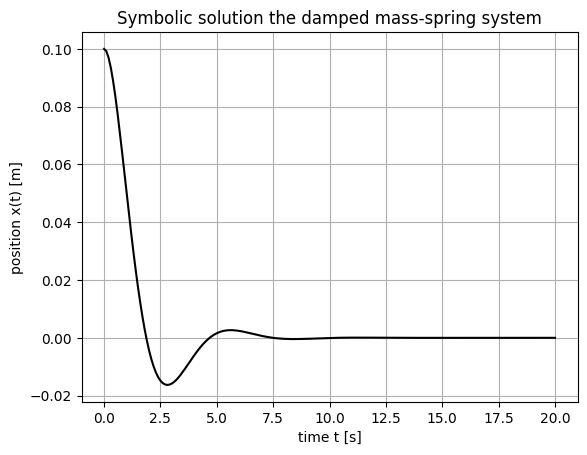

In [172]:
import matplotlib.pyplot as plt
import numpy as np

t_num = np.linspace(0, 20, 201) # Points at which we want to evaluate the solution x(t), here from 0 to 10 [s]

x_sol_num = np.real(solution_num(t_num)) # We use now our lambdified solution and apply a numpy array on it (Extracting only the real part for example)

plt.plot(t_num, x_sol_num, '-', color='black')
plt.title("Symbolic solution the damped mass-spring system")
plt.xlabel('time t [s]')
plt.ylabel('position x(t) [m]')
plt.grid()

--------------------
--------------------